In [1]:
#Grafico casos actuales
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import csv
seaborn.set_style("darkgrid")
results = {}
with open('infectados.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        results[row['Fecha']] = row['Infectados']
 
x = []
y = []

for dia in results.keys():
    x.append(dia)
    y.append(int(results[dia]))
y_original = y[:]
x_original = x[:]
plt.title("Coronavirus Argentina")
plt.yticks(np.arange(0, 800, 50))
plt.xticks(rotation=75)
plt.plot(x,y)


plt.savefig('Infectados.png')

In [275]:
from math import pi,cos,sin

class Cuadrados_minimos:
    def __init__(self, grado_poli, grado_trigo):
        self.coef = None
        self.matriz = None
        self.grado_poli = grado_poli
        self.grado_trigo = grado_trigo
        
    def armar_matriz(self, x_values):
        self.matriz = np.zeros((self.grado_poli + 3,len(x_values)))
        self.matriz[0] = [1 for elem in x_values]
        self.matriz[1] = [cos(x*pi*self.grado_trigo) for x in x_values]
        self.matriz[2] = [sin(x*pi*self.grado_trigo) for x in x_values]
        for i in range(0, self.grado_poli) :
            self.matriz[i+3] = [x_elem**(i+1) for x_elem in x_values]
        self.matriz = np.transpose(self.matriz)
        return self.matriz[:]
    
    def fit(self, x_values, y_values):
        matriz_aux = self.armar_matriz(x_values)
        aTa = np.dot(np.transpose(self.matriz),self.matriz)
        aTb = np.dot(np.transpose(self.matriz), y_values)
        self.coef, residuals, rank, sv = np.linalg.lstsq(aTa, aTb)
        
    def predict(self, x_values):
        funcion = self.armar_matriz(x_values)
        return np.dot(funcion, self.coef)

        
def esta_ordenado(lista):
    for i in range(0,len(lista) - 1):
        if lista[i] > lista[i+1]:
            return False
    return True

def cross_validation(x_train,y_train,particiones,grado_poli, grado_trigo):
    particion_anterior = 0
    diferencias = []
    tam_particion = int(len(x_train)/particiones)
    for i in range(particiones):
        if i != particiones-1:
            particion = int(len(x_train)/particiones)*(i+1)
            data_train = x_train[:particion]
            data_test   = x_train[particion:particion+tam_particion]
            y_entrenamiento = y_train[:particion]
            y_test  = y_train[particion:particion+tam_particion]
            particion_anterior = particion
            cm = Cuadrados_minimos(grado_poli, grado_trigo)
            cm.fit(data_train, y_entrenamiento)
            ys = cm.predict(data_test)
            if not esta_ordenado(ys):
                return 10000000
            diferencias.append(sum((ys-y_test)**2))
        #el ultimo se tiene que descartar porque por como agarro las particiones la ultima se compararia a si
        #misma ABS
    RMSE = (sum(diferencias)/(particiones-1))**(1./2)
    return RMSE    

        
        
        

In [3]:
import datetime 

inicio_cuarentena = "03/20"
def date_to_int(date):
    mes = int(date[0:2])
    dia = int(date[3:])
    mes_inicio_cuarentena = int(inicio_cuarentena[0:2])
    dia_inicio_cuarentena = int(inicio_cuarentena[3:])
    año = 2020
    fecha = datetime.datetime(año, mes, dia) 
    fecha_inicial_cuarentena= datetime.datetime(año, mes_inicio_cuarentena, dia_inicio_cuarentena)
    res = (fecha - fecha_inicial_cuarentena).days
    return res
    
    


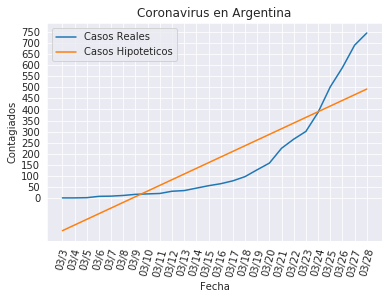

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

results = {}
with open('infectados.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        results[row['Fecha']] = row['Infectados']
 
x = []
y = []
for dia in results.keys():
    x.append([date_to_int(dia)])
    y.append(results[dia])


knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x,np.asarray(y).astype(np.float))


contagiados = list(knn.predict(x))

plt.yticks(np.arange(0, 800, 50))
plt.xticks(rotation=75)
plt.xlabel("Fecha")
plt.ylabel("Contagiados")
plt.title("Coronavirus en Argentina")

plt.plot(x_original, y_original)
plt.plot(x_original,contagiados)

plt.legend(['Casos Reales', 'Casos Hipoteticos'])

plt.savefig("Comparacion.svg")


In [177]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

results = {}
with open('infectados.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        results[row['Fecha']] = row['Infectados']
        
x_train = []
y_train = []
for dia in results.keys():
    x_train.append(date_to_int(dia))
    y_train.append(results[dia])
 
dias_de_cuarentena = []
fechas = []
with open('dias_de_cuarentena.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dias_de_cuarentena.append([date_to_int(row['Fecha'])])
        fechas.append(date_to_int(row['Fecha']))
print(dias_de_cuarentena)
        

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train,np.asarray(y_train).astype(np.float))

rl = LinearRegression()
rl.fit(x_train,np.asarray(y_train).astype(np.float))

ridge = Ridge()
ridge.fit(x_train,np.asarray(y_train).astype(np.float))
dias_de_cuarentena = x_train
contagiados = list(knn.predict(dias_de_cuarentena))
print(contagiados)
plt.plot(x_original, y_original)
plt.plot(x_original ,contagiados)
plt.yticks(np.arange(0, 800, 50))
plt.xticks(rotation=75)
plt.xlabel("Fecha")
plt.ylabel("Contagiados")
plt.title("Coronavirus en Argentina")



[[9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24]]


ValueError: Expected 2D array, got 1D array instead:
array=[-17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0
   1   2   3   4   5   6   7   8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [283]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

results = {}
fechas_train = []
with open('infectados.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        results[row['Fecha']] = row['Infectados']
        fechas_train.append(row['Fecha'])
    csvfile.close()
x = []
y = []
for dia in results.keys():
    x.append(date_to_int(dia))
    y.append(int(results[dia]))
y_original = y[:]
x_original = x[:]

fechas_cuarentena = []
dias_de_cuarentena = []
with open('dias_de_cuarentena.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dias_de_cuarentena.append(date_to_int(row['Fecha']))
        fechas_cuarentena.append(row['Fecha'])
    csvfile.close()
    
"""
grado_poli = 4
grado_trigo = 0.
cm = Cuadrados_minimos(grado_poli, grado_trigo)
cm.fit(x, np.asarray(y).astype(np.float))
print([int(x) for x in cm.predict(x)])



contagiados_pre = list(cm.predict(x_original))
contagiados_pre = list(map(lambda elem: int(elem) if elem > 0 else 0,  contagiados_pre))

contagiados_cuarentena = list(cm.predict(x_original))
contagiados_cuarentena = list(map(lambda elem: int(elem) if elem > 0 else 0,  contagiados_cuarentena))



avance = []
i = 0
while i < len(contagiados_cuarentena) - 1:
    avance.append(int(contagiados_cuarentena[i+1] - contagiados_cuarentena[i]))
    i += 1
    
avance_real = []
i = 0
while i < len(y_original) - 1:
    avance_real.append(int(y_original[i+1] - y_original[i]))
    i += 1
"""    
particiones = 6

grado_trigo = 0.0
grado_poli = 4
errores = []
minimo = 1000
setting = None
for grado_trigo in range(0,10):
    for iteraciones in range(0,200):
        grado_trigo += 0.001
        cm = Cuadrados_minimos(grado_poli, grado_trigo)
        cm.fit(x, np.asarray(y).astype(np.float))
        #print(sorted([int(res) for res in cm.predict(x)])) 
        if minimo > cross_validation(x_original, y_original, particiones, grado_poli, grado_trigo):
            if esta_ordenado(cm.predict(x)):
                minimo = cross_validation(x_original, y_original, particiones, grado_poli, grado_trigo)
                setting = (grado_poli,grado_trigo)
        errores.append(cross_validation(x_original, y_original, particiones, grado_poli, grado_trigo))

print(minimo,setting)
grado_poli, grado_trigo = setting
cm = Cuadrados_minimos(grado_poli, grado_trigo)
cm.fit(x, np.asarray(y).astype(np.float))
print(x)
print(cm.predict(x))
print(cm.predict(range(8,25)))
date_to_int('03/28')

/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


87.01257557335296 (4, 2.0059999999999993)
[-17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[ -8.19629127   1.50834199   8.22935809  12.57490061  15.15633214
  16.58823431  17.48840784  18.47787261  20.18086769  23.22485137
  28.24050122  35.86171414  46.72560633  61.47251338  80.74599027
 105.19281136 135.46297047 172.20968083 216.08937511 267.76170543
 327.88954337 397.13897993 476.17932555 565.6831101  666.32608283
 778.78721241]
[ 778.78721241  903.74868686 1041.89591353 1193.91751908 1360.50534943
 1542.35446976 1740.16316441 1954.63293689 2186.46850977 2436.37782469
 2705.07204226 2993.26554201 3301.67592235 3631.02400044 3982.03381219
 4355.43261214 4751.95087339]


8

In [86]:
"""
fechas_train_aux = []
espacios = ""
for i in range(len(fechas_train)):
    if i % 3 == 0:
        fechas_train_aux.append(fechas_train[i])
    else:
        espacios += " "
        fechas_train_aux.append(espacios)
fechas_train = fechas_train_aux
        
fechas_cuarentena_aux = []

for i in range(len(fechas_cuarentena)):
    if i % 3 == 0:
        fechas_cuarentena_aux.append(fechas_cuarentena[i])
    else:
        espacios += " "
        fechas_cuarentena_aux.append(espacios)
fechas_cuarentena = fechas_cuarentena_aux

plt.plot(fechas_train, y_original)
plt.plot(fechas_train, contagiados_cuarentena)

plt.legend(['Casos Reales', "Casos Hipotéticos"])

plt.savefig("Testing1.jpg")
"""

'\nfechas_train_aux = []\nespacios = ""\nfor i in range(len(fechas_train)):\n    if i % 3 == 0:\n        fechas_train_aux.append(fechas_train[i])\n    else:\n        espacios += " "\n        fechas_train_aux.append(espacios)\nfechas_train = fechas_train_aux\n        \nfechas_cuarentena_aux = []\n\nfor i in range(len(fechas_cuarentena)):\n    if i % 3 == 0:\n        fechas_cuarentena_aux.append(fechas_cuarentena[i])\n    else:\n        espacios += " "\n        fechas_cuarentena_aux.append(espacios)\nfechas_cuarentena = fechas_cuarentena_aux\n\nplt.plot(fechas_train, y_original)\nplt.plot(fechas_train, contagiados_cuarentena)\n\nplt.legend([\'Casos Reales\', "Casos Hipotéticos"])\n\nplt.savefig("Testing1.jpg")\n'